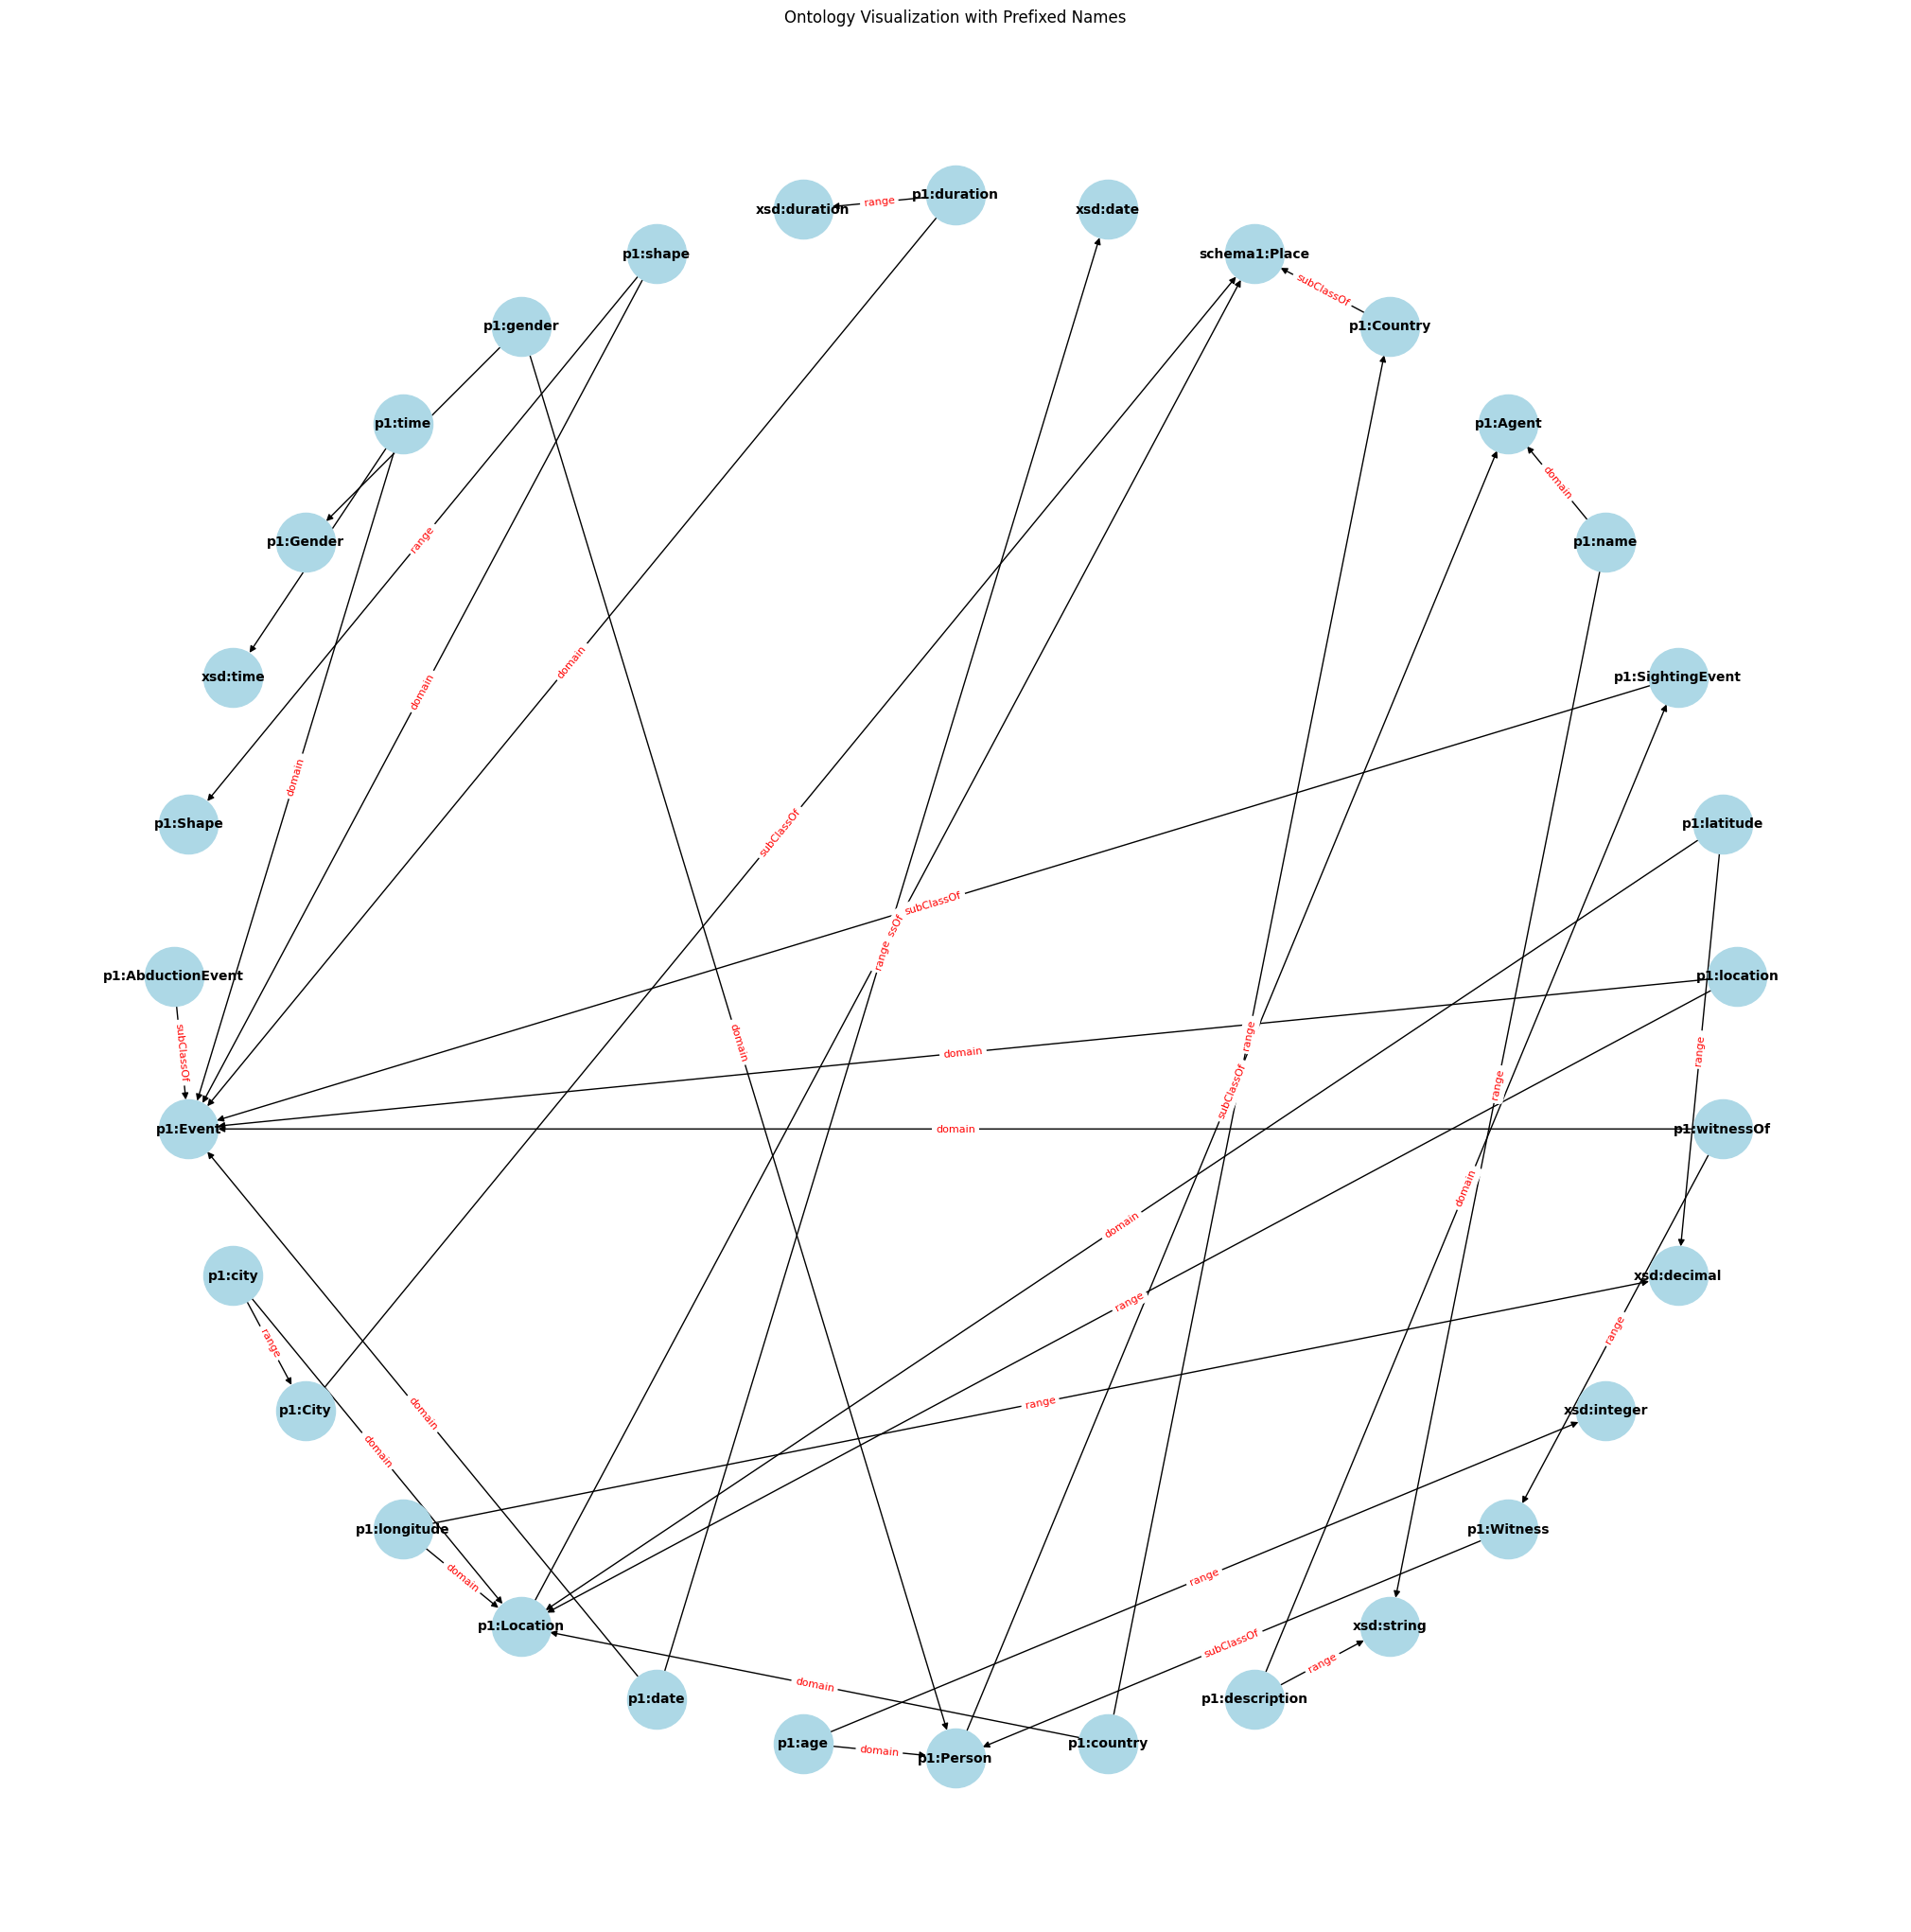

In [1]:
import rdflib
import networkx as nx
import matplotlib.pyplot as plt

file_path = "project.rdf"
g = rdflib.Graph()
g.parse(file_path, format="ttl")

g.bind("rdf", rdflib.RDF)
g.bind("rdfs", rdflib.RDFS)
g.bind("xsd", rdflib.XSD)
g.bind("owl", rdflib.OWL)

DG = nx.DiGraph()

def qname(uri):
    return g.namespace_manager.qname(rdflib.URIRef(uri))

for subj, pred, obj in g:
    subj_str = qname(subj)
    pred_str = qname(pred)
    obj_str = qname(obj)
    
    if pred == rdflib.RDFS.subClassOf:
        DG.add_node(subj_str, type='class')
        DG.add_node(obj_str, type='class')
        DG.add_edge(subj_str, obj_str, label='subClassOf')
    elif pred == rdflib.RDFS.domain:
        DG.add_node(subj_str, type='property')
        DG.add_node(obj_str, type='class')
        DG.add_edge(subj_str, obj_str, label='domain')
    elif pred == rdflib.RDFS.range:
        DG.add_node(subj_str, type='property')
        DG.add_node(obj_str, type='class')
        DG.add_edge(subj_str, obj_str, label='range')

plt.figure(figsize=(20, 20))

# Try a different layout algorithm
#pos = nx.spring_layout(DG, k=1, iterations=100)  # Further increase k and iterations
# Alternative layouts for comparison
#pos = nx.circular_layout(DG)
pos = nx.shell_layout(DG)

labels = nx.get_edge_attributes(DG, 'label')
node_labels = {node: node for node in DG.nodes()}

nx.draw(DG, pos, labels=node_labels, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels, font_size=8, font_color='red')

plt.title("Ontology Visualization with Prefixed Names")
plt.show()

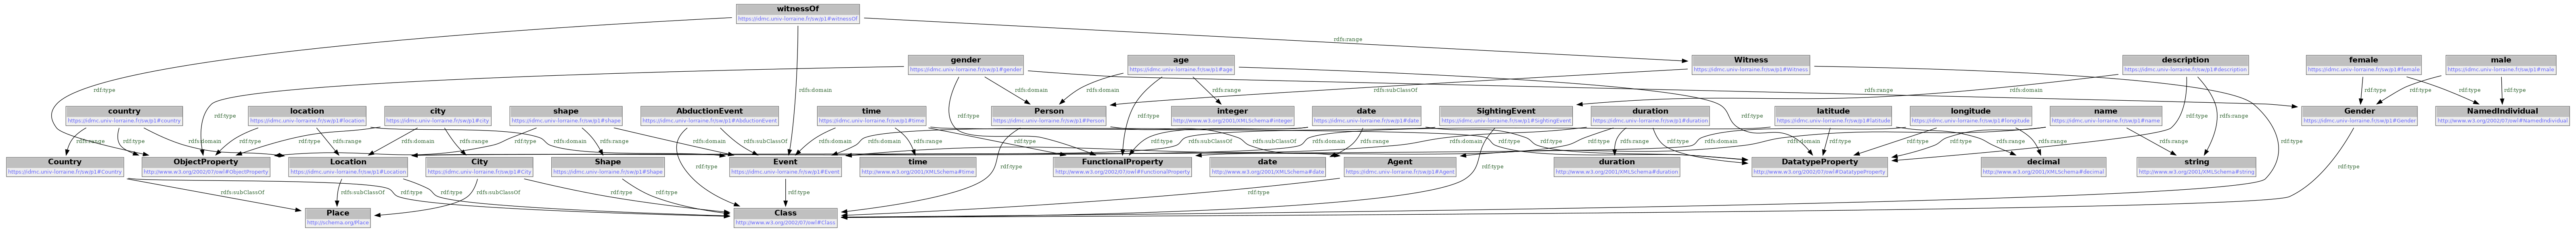

In [4]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

stream = io.StringIO()
rdf2dot(g, stream, opts = {display})
dg = pydotplus.graph_from_dot_data(stream.getvalue())
png = dg.create_png()
display(Image(png))